# Vecinos Cercanos

In [2]:
# Not basics
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import metrics
from imblearn.over_sampling import  RandomOverSampler
from sklearn.preprocessing import label_binarize
# Basics
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
datos_url= "C://Users/maxib/Source/repos/proyecto_final_coder/datos/Base_predictive_maintenance.csv"

In [3]:
# Leer .csv y creo un DF
df = pd.read_csv(datos_url, delimiter=",", index_col= ["UDI", "Product_ID"])
df.head()

,,Type,Air_temperature_[K],Process_temperature_[K],Rotational_speed_[rpm],Torque_[Nm],Tool_wear_[min],Target,Failure_Type
UDI,Product_ID,,,,,,,,
1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


# Variable Target

### Over sampling

In [4]:
# Preparamos variable Target para entrenar los algoritmos
X= df.drop(["Target","Type","Failure_Type"], axis=1) 
y= df["Target"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy=0.5)
# resampling X, y
X_ros_Target, y_ros_Target = ros.fit_resample(X, y)
# new class distribution 
y_ros_Target.value_counts()
X_ros_Target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14491 entries, 0 to 14490
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14491 non-null  float64
 1   Process_temperature_[K]  14491 non-null  float64
 2   Rotational_speed_[rpm]   14491 non-null  int64  
 3   Torque_[Nm]              14491 non-null  float64
 4   Tool_wear_[min]          14491 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 566.2 KB


## Vecinos cercanos variable binaria

Datos del testeo con Train Data
% de aciertos sobre el set de evaluación: 0.9875094886481264
[[9480  181]
 [   0 4830]]


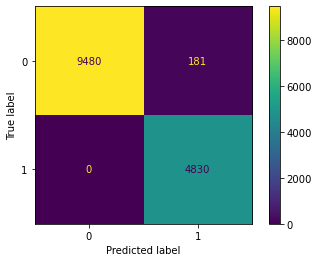

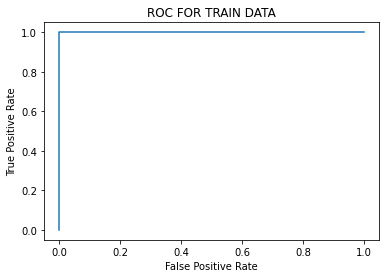

Recall Score del classificador Train: 1.0
F1 Score del classificador Train: 0.9816075602072961
% de aciertos sobre el set de evaluación: 0.9819


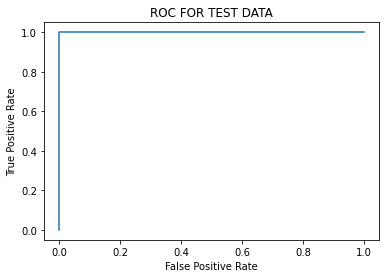

[[9480  181]
 [   0  339]]


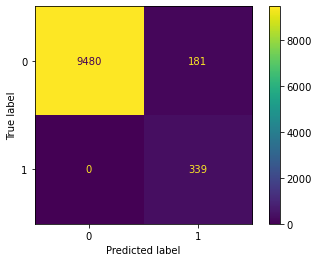

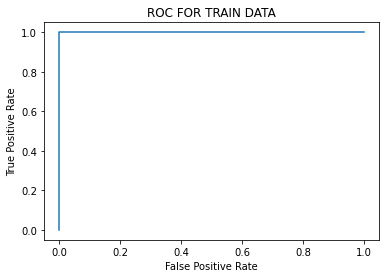

Recall Score del classificador Train: 1.0
F1 Score del classificador Train: 0.7892898719441211


In [5]:
# Implementacion y entrenamientos
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_ros_Target, y_ros_Target)
print("Datos del testeo con Train Data")
# Calculamos Datos Train
# ACCURACY
## Train
y_train_pred = knn.predict(X_ros_Target)
train_accuracy = metrics.accuracy_score(y_ros_Target, y_train_pred)
print('% de aciertos sobre el set de evaluación:',train_accuracy)
# Matriz de Confusión train
print(metrics.confusion_matrix(y_ros_Target, y_train_pred))
# Ploteamos la Matriz train
metrics.plot_confusion_matrix(knn, X_ros_Target, y_ros_Target)
plt.show()
# Graficamos ROC Train
y_pred_proba= knn.predict_proba(X_ros_Target)[::,1]
fpr, tpr, _= metrics.roc_curve(y_ros_Target,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC FOR TRAIN DATA")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Recall Train
print(f"Recall Score del classificador Train: {metrics.recall_score(y_ros_Target, y_train_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {metrics.f1_score(y_ros_Target, y_train_pred)}")

# Calculamos datos de Test
# ACCURACY
## Test
y_test_pred = knn.predict(X)
test_accuracy = metrics.accuracy_score(y, y_test_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)
# Graficamos ROC Test
y_pred_proba= knn.predict_proba(X)[::,1]
fpr, tpr, _= metrics.roc_curve(y,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC FOR TEST DATA")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Matriz de Confusión Test
print(metrics.confusion_matrix(y, y_test_pred))
# Ploteamos la Matriz train
metrics.plot_confusion_matrix(knn, X, y)
plt.show()
# Graficamos ROC Train
y_pred_proba= knn.predict_proba(X)[::,1]
fpr, tpr, _= metrics.roc_curve(y,  y_pred_proba)
plt.plot(fpr,tpr)
plt.title("ROC FOR TRAIN DATA")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Recall Train
print(f"Recall Score del classificador Train: {metrics.recall_score(y, y_test_pred)}")
# F1 Score Train
print(f"F1 Score del classificador Train: {metrics.f1_score(y, y_test_pred)}")



# Vairable Failure Type

## Oversampling

In [6]:
# Preparamos variable Target para entrenar los algoritmos.
X= df.drop(["Type","Target","Failure_Type"], axis=1) 
y= df["Failure_Type"]
# instantiating the random over sampler 
ros = RandomOverSampler(sampling_strategy={"Heat Dissipation Failure":1000,"Random Failures":1000,"Tool Wear Failure":1000,
                                            "Overstrain Failure":1000, "Power Failure":1000})
# resampling X, y
X_ros_failure, y_ros_failure = ros.fit_resample(X, y)
y_ros_failure.value_counts()
X_ros_failure.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14652 entries, 0 to 14651
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air_temperature_[K]      14652 non-null  float64
 1   Process_temperature_[K]  14652 non-null  float64
 2   Rotational_speed_[rpm]   14652 non-null  int64  
 3   Torque_[Nm]              14652 non-null  float64
 4   Tool_wear_[min]          14652 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 572.5 KB
